# HW1 - Data Analysis
### Dvir Yerushalmi    201271251
### Elad Lavie            - 304819600

<img src= "./trajectories.jpg" style="width:500px;height:150px" align="left">

# Question 1 - Warm-Up
a) Integrated Development Environment, or IDE is a software suite that consolidates the basic tools developers need to write and test software, Typically, an IDE contains a code editor, a compiler or interpreter and a debugger that the developer accesses through a single graphical user interface (GUI). An IDE may be a standalone application, or it may be included as part of one or more existing and compatible applications.
examples for IDE for python are: spyder, Ipython notebook, eclipse pydev and Pycharm.

b)
- __numpy__ -
NumPy is the a package for scientific computing with Python. NumPy’s main object is the homogeneous multidimensional array. it includes routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, and much more.
the basic of numpy is arrays. <br />
**our example** will be how to create matrix, and multiply each column of the matrix by a different number. assume we have this 5x3 dimentional array. <br />
my_matrix =  
        array(
        [[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]])
created using np.arange(15).reshape((5,3))
we want to multiply the first column by 2 and the third column by 3, and we want to do this in a vectoried way as fast as we can.
we can do this by:
**my_matrix\*np.array([2,1,3])**.
the result is:
       array(
       [[ 0,  1,  6],
       [ 6,  4, 15],
       [12,  7, 24],
       [18, 10, 33],
       [24, 13, 42]])
       
- __scipy__ - SciPy ia used for scientific computing and technical computing.
SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, etc.
SciPy builds on the NumPy array object and is part of the NumPy stack which includes tools like Matplotlib, pandas and SymPy.
**our tool** is the norm class, we will find the pdf (probability distribution function) of the normal distribution function, then plot it as stars

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import pandas as pd
print "the norm pdf"
for i in np.linspace(start=-2.8, stop=2.8, num= 33):
    print "".join(['*']*int((norm.pdf(i)*150)))

the norm pdf
*
*
**
****
******
*********
************
*****************
**********************
****************************
**********************************
****************************************
**********************************************
****************************************************
********************************************************
**********************************************************
***********************************************************
**********************************************************
********************************************************
****************************************************
**********************************************
****************************************
**********************************
****************************
**********************
*****************
************
*********
******
****
**
*
*


- __matplotlib__ -
Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.
**our tool** is the plot
plotting the above example as a graph -

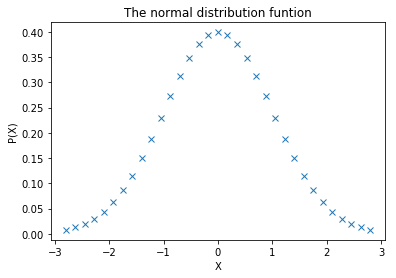

In [2]:

x = np.linspace(start=-2.8, stop=2.8, num= 33)
y = [norm.pdf(i) for i in x]
plot = plt.plot(x,y, 'x')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('The normal distribution funtion')

- **pandas**
pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.
**our tool** is the group-by option. we will create pandas table, group the table by the index, and then calculate the sum.

In [3]:
indices = np.array([1, 2, 3]*3)
values = np.random.randint(low = 0, high = 20, size = 9)
s = pd.Series(values,indices)
print "the table is:\n{}\n".format(s)
grouped = s.groupby(level = 0)
print "the sum is:\n{}\n".format(grouped.sum())

the table is:
1    19
2    16
3    19
1    11
2     2
3    15
1    18
2    19
3    17
dtype: int32

the sum is:
1    48
2    37
3    51
dtype: int32



- **scikit-learn**
a free software machine learning library, It features various classification, regression and clustering algorithms including support vector machines, random forests,and k-means.
**useful tool** is random forests, its usage is for classification.

- **NLTK**
NLTK is a platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic.
**useful tool** 
tagging part of speech, which may be 
        CC	Coordinating conjunction
        CD	Cardinal number
        DT	Determiner
        EX	Existential there
        FW	Foreign word
        IN	Preposition or subordinating conjunction
        JJ	Adjective
        JJR	Adjective, comparative
and <a herf= "https://cs.nyu.edu/grishman/jet/guide/PennPOS.html" > many more </a>



In [4]:
headers = ['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO',
           'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST',
           'Tz database time zone', 'Type', 'Source']
airports = pd.read_csv("airports.dat", header=None,names=headers)

# Print all airport names of a specific country you like.
print("\n".join(airports[(airports['Country']
                          == 'Israel')]['Name'].unique()))

Ben Gurion International Airport
Beersheba (Teyman) Airport
Tel Nof Air Base
Ein Shemer Airfield
Eilat Airport
Ein Yahav Airfield
Haifa International Airport
Hatzor Air Base
Ben Ya'akov Airport
Megiddo Airport
Bar Yehuda Airfield
Nevatim Air Base
Ovda International Airport
Ramat David Air Base
Ramon Air Base
Sde Dov Airport


In [5]:
#counts the number of airports in each country
unique_airports_per_country = airports.drop_duplicates(['Country','Name'])
print(airports['Country'].value_counts())

United States                     1435
Canada                             417
Australia                          296
Germany                            241
Russia                             238
Brazil                             234
France                             214
China                              180
United Kingdom                     162
India                              125
Indonesia                          125
Japan                              119
South Africa                        96
Argentina                           94
Mexico                              83
Italy                               82
Iran                                81
Sweden                              77
Colombia                            74
Turkey                              72
Philippines                         64
Spain                               62
Norway                              61
Venezuela                           57
Greece                              55
New Zealand              

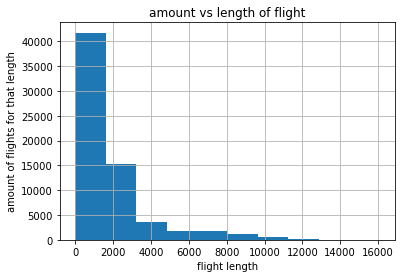

In [7]:
# 4. Route length analysis
import math

headers = ['Airline', 'Airline ID', 'Source airport',
           'Source airport ID', 'Destination airport',
           'Destination airport ID', 'Codeshare', 'Stops', 'Equipment']
routes =  pd.read_csv("routes.dat", header=None,names=headers)
routes_no_none = routes[(routes['Source airport ID'] != r'\N')
                        & (routes['Destination airport ID'] != r'\N')]

def distance(lat1, long1, lat2, long2):
    R = 6371 # Earth Radius in Km
    dLat = math.radians(lat2 - lat1) # Convert Degrees 2 Radians
    dLong = math.radians(long2 - long1)
    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.sin(dLong/2) \
    * math.sin(dLong/2) * math.cos(lat1) * math.cos(lat2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c
    return d


airport_to_curds = {int(airport[1]['Airport ID']) : 
                    (airport[1]['Latitude'],airport[1]['Longitude'])
                    for airport in airports.iterrows()}
distances = list()
for route in routes_no_none.iterrows():
    source_airport_id = int(route[1]['Source airport ID'])
    destination_airport_id = int(route[1]['Destination airport ID'])
    # ignore routes which either course or destination
    # and can't be found in the dict
    try:
        source_airport_cords = airport_to_curds[source_airport_id]
        destination_airport_cords = airport_to_curds[
            destination_airport_id]
    except KeyError as e:
        continue
    distance_val = distance(source_airport_cords[0],
                            source_airport_cords[1],
                            destination_airport_cords[0],
                            destination_airport_cords[1])
    distances.append(distance_val)
    
plot = pd.DataFrame.hist(pd.DataFrame(distances))
plt.xlabel('flight length')
plt.ylabel('amount of flights for that length')
plt.title('amount vs length of flight')    
    
    